In [13]:
! pip install kagglehub pandas scikit-learn matplotlib seaborn

In [3]:
import kagglehub
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("thoughtvector/customer-support-on-twitter")

print("Path to dataset files:", path)

100%|██████████| 169M/169M [00:23<00:00, 7.61MB/s] 

Extracting files...


Path to dataset files: /home/repl/.cache/kagglehub/datasets/thoughtvector/customer-support-on-twitter/versions/10


In [29]:
import os
import pandas as pd

# Define the path to your dataset directory
path = '/home/repl/.cache/kagglehub/datasets/thoughtvector/customer-support-on-twitter/versions/10'

# List all CSV files in the dataset directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Load all CSV files into dataframes
dfs = [pd.read_csv(os.path.join(path, csv_file)) for csv_file in csv_files]

# If you want to access the first and second dataframe:
df1 = dfs[0] if len(dfs) > 0 else None


# Show the first dataframe
df1

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
...,...,...,...,...,...,...,...
88,119330,105859,True,Wed Oct 11 13:50:42 +0000 2017,@105860 I wish Amazon had an option of where I...,119329,119331.0
89,119331,105860,True,Wed Oct 11 13:47:14 +0000 2017,They reschedule my shit for tomorrow https://t...,119330,NaN
90,119332,Tesco,False,Wed Oct 11 13:34:06 +0000 2017,"@105861 Hey Sara, sorry to hear of the issues ...",119333,119334.0
91,119333,105861,True,Wed Oct 11 14:05:18 +0000 2017,@Tesco bit of both - finding the layout cumber...,"119335,119336",119332.0


In [27]:
print(df2)

None


In [14]:
# Ensure 'created_at' is datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])

# Feature engineering for visualization
df1['hour'] = df1['created_at'].dt.hour
df1['dayofweek'] = df1['created_at'].dt.dayofweek
df1['text_length'] = df1['text'].astype(str).apply(len)
df1['word_count'] = df1['text'].astype(str).apply(lambda x: len(x.split()))
df1['has_response'] = df1['response_tweet_id'].notnull()
df1['in_response'] = df1['in_response_to_tweet_id'].notnull()

# 1. 3D Scatter: Hour vs Day of Week vs Text Length, colored by Inbound
fig1 = px.scatter_3d(df1, x='hour', y='dayofweek', z='text_length', color='inbound',
                     title='Hour vs Day of Week vs Text Length (Inbound)')
fig1.show()



In [15]:
# 2. 3D Scatter: Hour vs Day of Week vs Word Count, colored by Has Response
fig2 = px.scatter_3d(df1, x='hour', y='dayofweek', z='word_count', color='has_response',
                     title='Hour vs Day of Week vs Word Count (Has Response)')
fig2.show()

# 3. 3D Histogram: Hour, Day of Week, Inbound
fig3 = px.density_heatmap(df1, x='hour', y='dayofweek', z='inbound', nbinsx=24, nbinsy=7,
                          title='3D Histogram: Hour, Day of Week, Inbound')
fig3.update_traces(zsmooth='best')
fig3.show()


In [ ]:

# 4. 3D Surface: Average Text Length by Hour and Day of Week
pivot1 = df1.pivot_table(index='hour', columns='dayofweek', values='text_length', aggfunc='mean')
fig4 = go.Figure(data=[go.Surface(z=pivot1.values, x=pivot1.index, y=pivot1.columns)])
fig4.update_layout(title='Avg Text Length by Hour and Day of Week', scene=dict(
    xaxis_title='Hour', yaxis_title='Day of Week', zaxis_title='Avg Text Length'))
fig4.show()

# 5. 3D Surface: Count of Tweets by Hour and Day of Week
pivot2 = df1.pivot_table(index='hour', columns='dayofweek', values='tweet_id', aggfunc='count')
fig5 = go.Figure(data=[go.Surface(z=pivot2.values, x=pivot2.index, y=pivot2.columns)])
fig5.update_layout(title='Tweet Count by Hour and Day of Week', scene=dict(
    xaxis_title='Hour', yaxis_title='Day of Week', zaxis_title='Tweet Count'))
fig5.show()

# 6. 3D Bar: Author vs Inbound vs Tweet Count (Top 10 authors)
top_authors = df1['author_id'].value_counts().head(10).index
df_top = df1[df1['author_id'].isin(top_authors)]
grouped = df_top.groupby(['author_id', 'inbound']).size().reset_index(name='count')
fig6 = px.bar_3d(grouped, x='author_id', y='inbound', z='count',
                 title='Top 10 Authors: Inbound vs Tweet Count')
fig6.show()

# 7. 3D Scatter: Text Length vs Word Count vs Hour, colored by Inbound
fig7 = px.scatter_3d(df1, x='text_length', y='word_count', z='hour', color='inbound',
                     title='Text Length vs Word Count vs Hour (Inbound)')
fig7.show()

# 8. 3D Scatter: Text Length vs Word Count vs Day of Week, colored by Has Response
fig8 = px.scatter_3d(df1, x='text_length', y='word_count', z='dayofweek', color='has_response',
                     title='Text Length vs Word Count vs Day of Week (Has Response)')
fig8.show()

# 9. 3D Scatter: Hour vs Text Length vs Has Response, colored by Inbound
fig9 = px.scatter_3d(df1, x='hour', y='text_length', z='has_response', color='inbound',
                     title='Hour vs Text Length vs Has Response (Inbound)')
fig9.show()

# 10. 3D Scatter: Day of Week vs Word Count vs In Response, colored by Inbound
fig10 = px.scatter_3d(df1, x='dayofweek', y='word_count', z='in_response', color='inbound',
                      title='Day of Week vs Word Count vs In Response (Inbound)')
fig10.show()

AttributeError: module 'plotly.express' has no attribute 'bar_3d'

In [23]:
df1

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,hour,dayofweek,text_length,word_count,has_response,in_response
0,119237,105834,True,2017-10-11 06:55:44+00:00,@AppleSupport causing the reply to be disregar...,119236,NaN,6,2,109,16,True,False
1,119238,ChaseSupport,False,2017-10-11 13:25:49+00:00,@105835 Your business means a lot to us. Pleas...,NaN,119239.0,13,2,141,22,False,True
2,119239,105835,True,2017-10-11 13:00:09+00:00,@76328 I really hope you all change but I'm su...,119238,NaN,13,2,86,17,True,False
3,119240,VirginTrains,False,2017-10-10 15:16:08+00:00,@105836 LiveChat is online at the moment - htt...,119241,119242.0,15,1,147,26,True,True
4,119241,105836,True,2017-10-10 15:17:21+00:00,@VirginTrains see attached error message. I've...,119243,119240.0,15,1,127,17,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,119330,105859,True,2017-10-11 13:50:42+00:00,@105860 I wish Amazon had an option of where I...,119329,119331.0,13,2,124,28,True,True
89,119331,105860,True,2017-10-11 13:47:14+00:00,They reschedule my shit for tomorrow https://t...,119330,NaN,13,2,60,7,True,False
90,119332,Tesco,False,2017-10-11 13:34:06+00:00,"@105861 Hey Sara, sorry to hear of the issues ...",119333,119334.0,13,2,147,31,True,True
91,119333,105861,True,2017-10-11 14:05:18+00:00,@Tesco bit of both - finding the layout cumber...,"119335,119336",119332.0,14,2,170,29,True,True


In [30]:
df1.isnull().sum()

tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id    25
dtype: int64

In [37]:
df1.info()
df1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     bool   
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.6+ KB


tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object

In [36]:
-- Explore the data in the table
SELECT *
FROM 'twcs.csv'
LIMIT 5

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,None,1
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6


In [39]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,None,1
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6


In [40]:
# Filter for inbound tweets only (the customer's query)
df_inbound = df[df['inbound'] == True].copy()

# Select only the columns we need
df_inbound = df_inbound[['tweet_id', 'author_id', 'text']]

# Check for missing values
print("\nMissing values in our selected columns:")
print(df_inbound.isnull().sum())

# Drop rows where the 'text' is missing, as they are useless to us
df_inbound.dropna(subset=['text'], inplace=True)

print(f"\nShape of the dataframe after cleaning: {df_inbound.shape}")
display(df_inbound.head())


Missing values in our selected columns:
tweet_id     0
author_id    0
text         0
dtype: int64

Shape of the dataframe after cleaning: (3, 3)


,tweet_id,author_id,text
1,2,115712,@sprintcare and how do you propose we do that
2,3,115712,@sprintcare I have sent several private messag...
4,5,115712,@sprintcare I did.


In [41]:
# Define keywords for each category
# Note: These are simple to start. We could make them much more complex.
keywords = {
    'Technical Issue': ['fail', 'error', 'broken', 'not working', 'issue', 'bug', 'slow', 'down', 'crash'],
    'Billing/Order': ['payment', 'charge', 'order', 'bill', 'refund', 'invoice', 'delivery', 'purchase'],
    'General Inquiry': ['question', 'how to', 'help', 'info', 'does this', 'support']
}

def assign_category(text):
    """Assigns a category to a ticket based on keywords."""
    if not isinstance(text, str):
        return 'Uncategorized'
        
    text = text.lower()
    for category, kws in keywords.items():
        if any(kw in text for kw in kws):
            return category
    return 'General Inquiry' 


df_inbound['category'] = df_inbound['text'].apply(assign_category)

print("\nValue counts of our new 'category' column:")
print(df_inbound['category'].value_counts())

display(df_inbound.head())


Value counts of our new 'category' column:
category
General Inquiry    3
Name: count, dtype: int64


,tweet_id,author_id,text,category
1,2,115712,@sprintcare and how do you propose we do that,General Inquiry
2,3,115712,@sprintcare I have sent several private messag...,General Inquiry
4,5,115712,@sprintcare I did.,General Inquiry


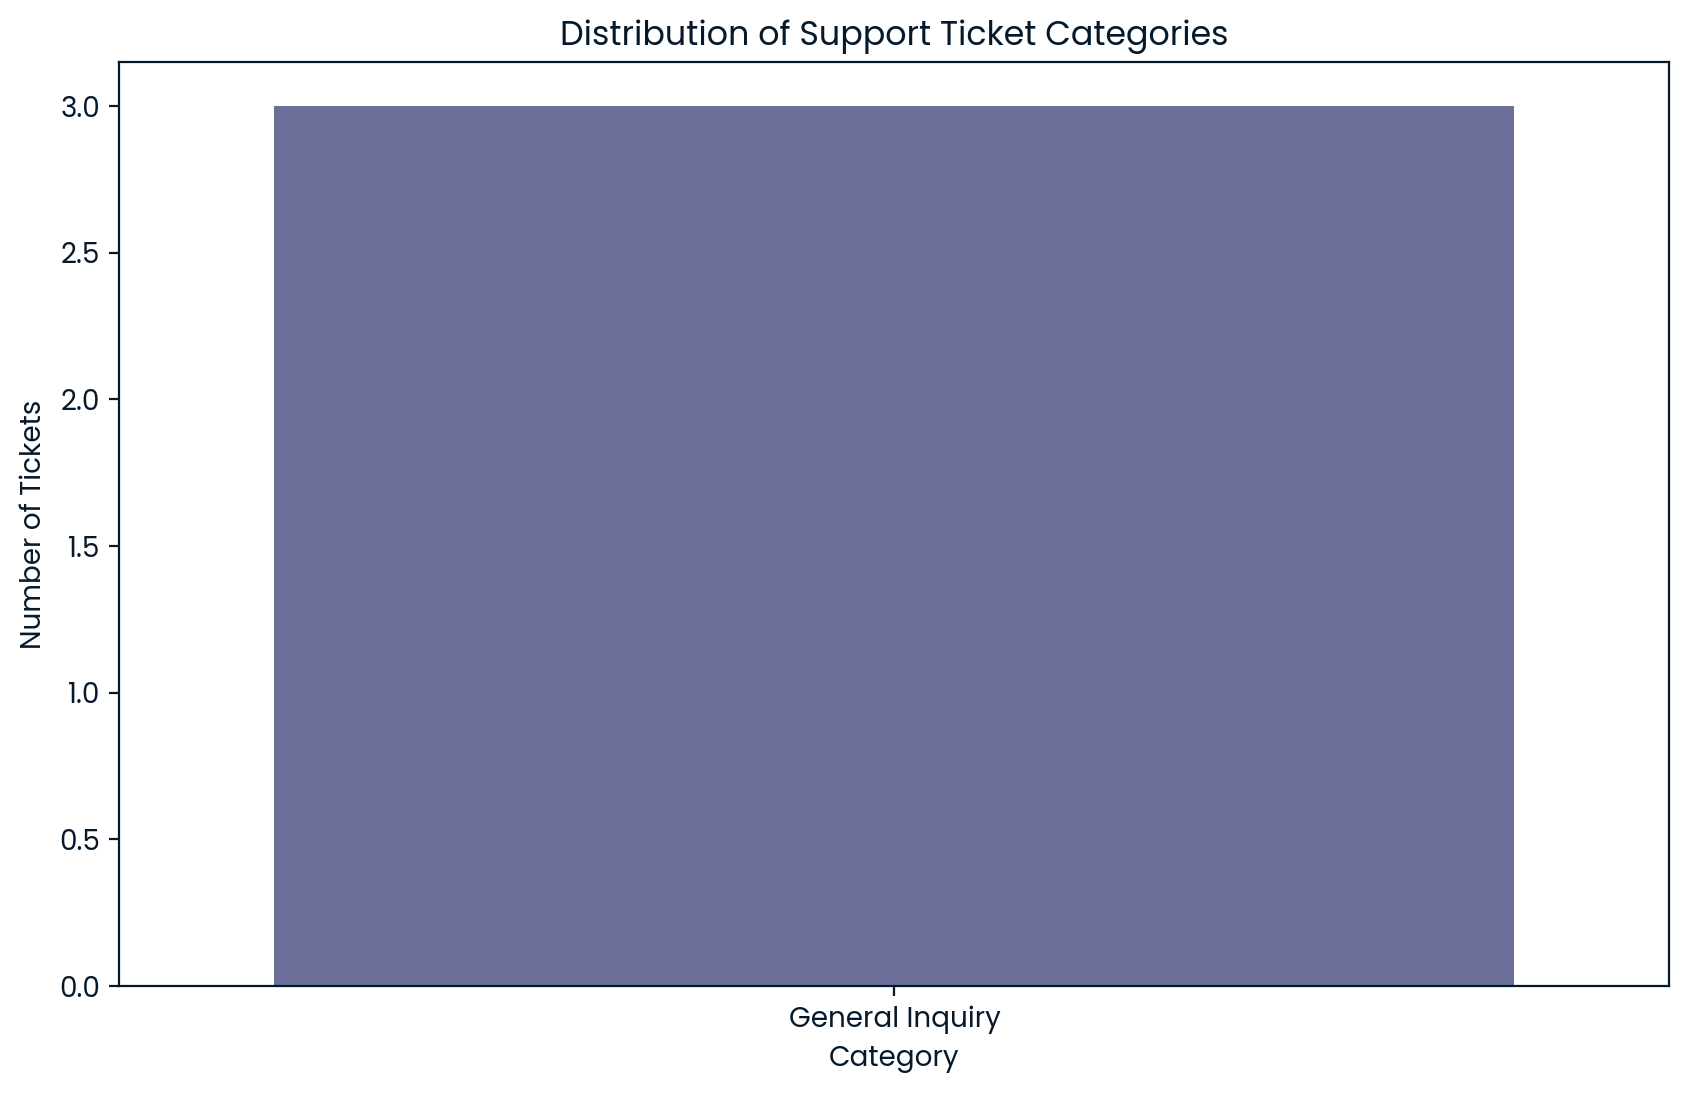

In [48]:
# Plot the distribution of categories
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df_inbound, x='category', order=df_inbound['category'].value_counts().index)
plt.title('Distribution of Support Ticket Categories')
plt.xlabel('Category')
plt.ylabel('Number of Tickets')
plt.show()

In [53]:
-- Explore the data in the table
SELECT *
FROM 'twcs.csv'
LIMIT 50

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,None,1
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",<NA>
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,None,12
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16


## DVC --Data Versioncontrol

In [54]:
 ! pip install dvc

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 71.3 MB/s  0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144591 sha256=06cda71a9862bc9061f7a4492e150d48ab200fa2f00151d32733b2ea090b0ca0
  Stored in directory: /home/repl/.cache/pip/wheels/1f/be/48/13754633f1d08d1fbfc60d5e80ae1e5d7329500477685286cd
Successfully built antlr4-python3-runtime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43/43 [dvc] [dvc] [celery]p]e]]]3-runtime]


In [55]:
!mkdir data

In [56]:
!ls

data  notebook.ipynb


In [59]:
# Save the processed dataframe to a new file in the data directory
processed_data_path = 'data/processed_tickets.csv'
df_inbound.to_csv(processed_data_path, index=False)

print(f"Processed data saved to {processed_data_path}")

Processed data saved to data/processed_tickets.csv


In [72]:
%ls
%pwd

data/  notebook.ipynb


'/work/files/workspace'

In [74]:
! git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint:
hint: 	git config --global init.defaultBranch <name>
hint:
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint:
hint: 	git branch -m <name>
hint:
hint: Disable this message with "git config set advice.defaultBranchName false"
Initialized empty Git repository in /work/files/workspace/.git/


In [78]:
! dvc init --force

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [79]:
! dvc add data/processed_tickets.csv

 ⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/work/files/workspace/.dvc/cache/files/md5'| |0/? [00:00
                                                                                
!
  0%|          |Adding data/processed_tickets.csv to c0/1 [00:00<?,     ?file/s]
100%|██████████|Adding data/processed_tickets.csv 1/1 [00:00<00:00,  5.57file/s]
                                                                                
!
  0%|          |Checking out /work/files/workspace/dat0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00,  1.63file/s]

To track the changes with git, run:

	git add data/.gitignore data/processed_tickets.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [80]:
! git add data/.gitignore data/processed_tickets.csv.dvc
! dvc config core.autostage true

## Phase 2 - Building the **Classifier**